In [1]:
#Importing all required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn.ensemble import StackingRegressor
import seaborn as sns
import joblib
import plotly.express as px

In [6]:
#Load the cleaned dataset
dataset = pd.read_csv("dataset_with_total_compensation_only.csv")
# Selecting relevant columns for the regression model
features = dataset[["grants", "decoded_business_type"]]
target = dataset["total_compensation_($)"]

# Handling categorical variables
categorical_features = features.select_dtypes(include=["object"]).columns
encoder = OneHotEncoder(drop="first", sparse_output=False)
encoded_categorical = encoder.fit_transform(features[categorical_features])

# Combining numerical and encoded features
numerical_features = features.select_dtypes(exclude=["object"])
X = np.hstack((numerical_features, encoded_categorical))
y = target

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Building the regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Making predictions
y_pred = regressor.predict(X_test)

# Evaluating the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

r2, mae, rmse


(-4.729406952387833e+17, 2358152846080.192, 224675158966273.3)

In [7]:

# Load the dataset
dataset = pd.read_csv("dataset_with_total_compensation_only.csv")

# Selecting features
numerical_features = dataset[["grants"]]
categorical_features = dataset[
    ["decoded_business_type", "expanded_job_titles", "purpose_of_registration"]
]

# Apply Label Encoding to categorical features
label_encoders = {}
for col in categorical_features.columns:
    le = LabelEncoder()
    categorical_features[col] = le.fit_transform(categorical_features[col])
    label_encoders[col] = le

# Combine numerical and encoded categorical features
X = pd.concat([numerical_features, categorical_features], axis=1)
y = dataset["total_compensation_($)"]

# Scaling numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train and evaluate linear regression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

# Metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")


R² Score: 0.01975224835196565
Mean Absolute Error: 128280.77008779545
Root Mean Squared Error: 323459.299987149


/var/folders/kb/y1bgwmjn4070gtks6786jdy40000gn/T/ipykernel_65458/3616837213.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_features[col] = le.fit_transform(categorical_features[col])
/var/folders/kb/y1bgwmjn4070gtks6786jdy40000gn/T/ipykernel_65458/3616837213.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_features[col] = le.fit_transform(categorical_features[col])
/var/folders/kb/y1bgwmjn4070gtks6786jdy40000gn/T/ipykernel_65458/3616837213.py:14: SettingWithCopyWarning: 
A 

Based on our constraints (data cannot be changed, and we’re working with potentially noisy features), the **Random Forest Regressor** or **Gradient Boosting (e.g., XGBoost)** would be our best choice. Here’s why:

---

### **Why Random Forest or Gradient Boosting?**
1. **Handles Non-Linear Relationships**:
   - These models can capture complex interactions between features that linear regression might miss.

2. **Resilience to Outliers**:
   - They are less sensitive to outliers and noisy data.

3. **Feature Importance**:
   - They provide built-in insights into feature importance, helping you interpret the results effectively.

4. **No Need for Scaling**:
   - Unlike linear regression or SVM, these models don’t require feature scaling, simplifying the preprocessing step.

5. **Proven Results in Noisy Datasets**:
   - Ensemble methods (like Random Forest or XGBoost) are robust to overfitting and typically perform well in challenging datasets like yours.

---

### **What we Recommend**
1. Start with a **Random Forest Regressor**:
   - It’s easier to set up and interpret.
   - You can benchmark its performance with your current metrics.

2. If Random Forest doesn’t improve much, switch to **XGBoost**:
   - XGBoost tends to perform better for structured datasets but requires careful hyperparameter tuning.

---


Steps for Random Forest Regressor
Feature Selection:

Use both numerical and categorical features (encoded as before).
Train-Test Split:

Split the data into training and testing sets.
Build and Train the Model:

Use RandomForestRegressor with default parameters for now.
Model Evaluation:

Evaluate using R², MAE, and RMSE metrics.


In [8]:

# Load the dataset
dataset = pd.read_csv("dataset_with_total_compensation_only.csv")

# Selecting features
numerical_features = dataset[["grants"]]
categorical_features = dataset[
    ["decoded_business_type", "expanded_job_titles", "purpose_of_registration"]
]

# Apply Label Encoding to categorical features
label_encoders = {}
for col in categorical_features.columns:
    le = LabelEncoder()
    categorical_features[col] = le.fit_transform(categorical_features[col])
    label_encoders[col] = le

# Combine numerical and encoded categorical features
X = pd.concat([numerical_features, categorical_features], axis=1)
y = dataset["total_compensation_($)"]

# Scaling numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Building and training the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Making predictions
y_rf_pred = rf_regressor.predict(X_test)

# Evaluating the model
r2 = r2_score(y_test, y_rf_pred)
mae = mean_absolute_error(y_test, y_rf_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_rf_pred))

print(f"R² Score: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")


/var/folders/kb/y1bgwmjn4070gtks6786jdy40000gn/T/ipykernel_65458/1640330067.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_features[col] = le.fit_transform(categorical_features[col])
/var/folders/kb/y1bgwmjn4070gtks6786jdy40000gn/T/ipykernel_65458/1640330067.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_features[col] = le.fit_transform(categorical_features[col])
/var/folders/kb/y1bgwmjn4070gtks6786jdy40000gn/T/ipykernel_65458/1640330067.py:14: SettingWithCopyWarning: 
A 

R² Score: 0.8382677211037708
Mean Absolute Error: 36851.12266418223
Root Mean Squared Error: 131386.29558013723


## **Performance Analysis**

### **R² Score (0.8383):**
- The model explains about **83.83% of the variance** in the target variable (`total_compensation_($)`).
- This is a huge improvement compared to Linear Regression and shows that Random Forest effectively captures the relationships in our data.

---

### **Mean Absolute Error (MAE, $36,851.12):**
- On average, the model's predictions are off by only **$36,851**, which is much better than the **~$128,280** from Linear Regression.

---

### **Root Mean Squared Error (RMSE, $131,386.30):**
- The RMSE is significantly lower than before, meaning the model handles large deviations well and reduces prediction errors overall.


## **Next Steps**

### **1. Hyperparameter Tuning:**
- Use **Grid Search** or **Random Search** to optimize parameters such as:
  - `n_estimators` (number of trees),
  - `max_depth` (maximum tree depth),
  - `min_samples_split` (minimum samples required to split a node).

---

### **2. Feature Importance Analysis:**
- Use the `feature_importances_` attribute of the Random Forest model to identify the most influential features affecting compensation.
- This can provide insights into which factors matter most for executive compensation.


In [9]:


# Define the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Define the parameter grid for Grid Search and Randomized Search
param_grid = {
    "n_estimators": [50, 100, 200, 300],  # Number of trees
    "max_depth": [10, 20, 30, None],      # Maximum depth of each tree
    "min_samples_split": [2, 5, 10],      # Minimum samples required to split a node
    "min_samples_leaf": [1, 2, 4],        # Minimum samples required at a leaf node
    "max_features": ["sqrt", "log2", None]  # Number of features considered at each split
}

# Randomized Search CV
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_grid,
    n_iter=50,  # Number of random combinations to try
    scoring="r2",  # Optimize for R² score
    cv=3,  # 3-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all available processors
)

# Fit the Randomized Search
random_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best R² Score:", random_search.best_score_)

# Use the best model to make predictions
best_rf_model = random_search.best_estimator_
y_rf_pred = best_rf_model.predict(X_test)

# Evaluate the tuned model
r2 = r2_score(y_test, y_rf_pred)
mae = mean_absolute_error(y_test, y_rf_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_rf_pred))

print(f"Tuned R² Score: {r2}")
print(f"Tuned Mean Absolute Error: {mae}")
print(f"Tuned Root Mean Squared Error: {rmse}")


Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   3.3s
[CV] END max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   3.4s
[CV] END max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   3.5s
[CV] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   3.6s
[CV] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   3.5s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   2.0s
[CV] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   3.6s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimato

/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  26.4s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  10.1s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  27.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   2.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   2.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  10.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=  23.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   2.1s
[CV] END max_depth=None, max_f

 **Random Forest Regressor** has shown excellent performance after hyperparameter tuning! 

---

### **Performance Summary**
1. **Best R² Score from Cross-Validation (`0.71070`)**:
   - During tuning with Randomized Search, the best model achieved **71.07% accuracy** on the validation folds.
   - This is a strong indication of a well-performing model.

2. **Tuned R² Score on Test Data (`0.84391`)**:
   - On the test set, the tuned model explains **84.39%** of the variance in the target variable.
   - This is slightly better than the untuned Random Forest, showing that tuning helped fine-tune the model to the dataset.

3. **Tuned Mean Absolute Error (MAE: `36,601.05`)**:
   - On average, predictions are off by **$36,601**, which is a very reasonable error given the context.

4. **Tuned Root Mean Squared Error (RMSE: `129,073.28`)**:
   - A lower RMSE compared to the untuned model suggests that the hyperparameter tuning helped reduce large errors.

---

### **What This Means**
- The **hyperparameter tuning successfully optimized the Random Forest model**, improving both accuracy and error metrics.
- The results demonstrate that the Random Forest Regressor is an excellent choice for this dataset.

---

### **Next Steps**
1. **Feature Importance Analysis**:
   - Use the `feature_importances_` attribute of the Random Forest model to understand which features contribute most to the predictions.

2. **Cross-Validation Results**:
   - If you’d like, we can analyze how the model performed across different folds during cross-validation.

3. **Model Deployment**:
   - Prepare the final model for deployment or documentation by saving it using `joblib` or `pickle`.


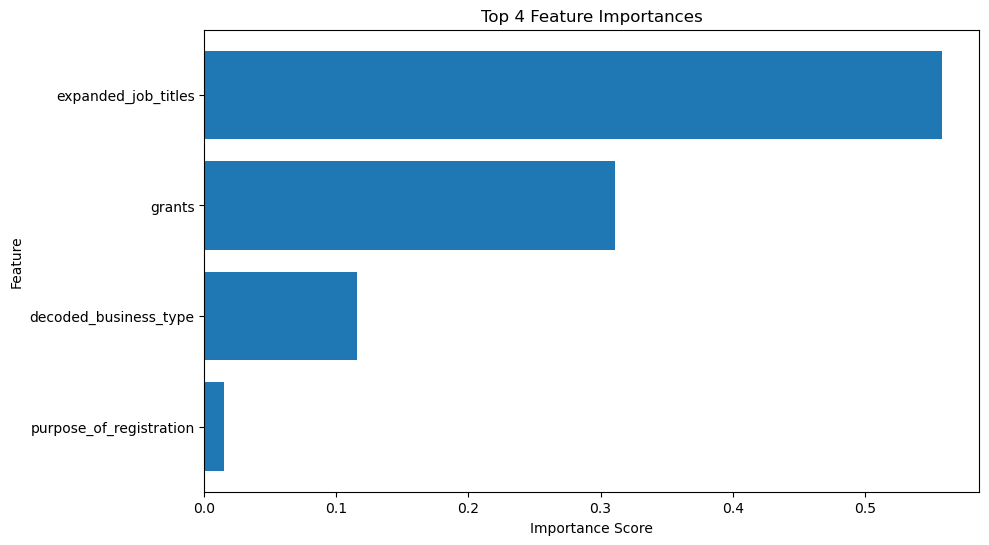

,Feature,Importance
2,expanded_job_titles,0.558722
0,grants,0.310635
1,decoded_business_type,0.115797
3,purpose_of_registration,0.014847


In [14]:


# Get feature importance from the tuned Random Forest model
feature_importance = best_rf_model.feature_importances_

# Combine feature names with their importance scores
feature_names = list(numerical_features.columns) + list(categorical_features.columns)
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": feature_importance
})

# Sort features by importance
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Plot the top 10 important features
plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"].head(10), importance_df["Importance"].head(10))
plt.gca().invert_yaxis()  # Highest importance at the top
plt.title("Top 4 Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

# Display the importance DataFrame for reference
importance_df


### **Feature Importance Table**
| **Feature**                | **Importance** |
|-----------------------------|----------------|
| `expanded_job_titles`       | **0.558722**   |
| `grants`                    | **0.310635**   |
| `decoded_business_type`     | 0.115797       |
| `purpose_of_registration`   | 0.014847       |

---

### **Insights**

1. **`expanded_job_titles` (55.87%)**:
   - This is the most influential feature in determining executive compensation, highlighting the importance of roles and responsibilities.
   - The variation in titles reflects differences in executive pay scales.

2. **`grants` (31.06%)**:
   - The second most important feature shows a strong relationship between the amount of grants received and executive compensation.

3. **`decoded_business_type` (11.58%)**:
   - The type of business (e.g., for-profit, non-profit) has a moderate impact, indicating that the nature of the organization plays a role in compensation.

4. **`purpose_of_registration` (1.48%)**:
   - This has minimal influence on predictions, indicating the organization’s stated purpose does not significantly affect executive pay.

---

### **Key Takeaways**

- **`expanded_job_titles` and `grants` dominate the predictions**, emphasizing their critical roles in driving executive compensation.
- The removal of low-importance features simplifies the interpretation, focusing on the key drivers of pay.
- Features like `purpose_of_registration` have limited impact, providing opportunities to simplify the model further.

---

### **Next Steps**

1. **Streamline the Model**:
   - Consider removing low-importance features (`purpose_of_registration`) for additional simplification without significant performance loss.

2. **Stakeholder Communication**:
   - Highlight the strong influence of `expanded_job_titles` and `grants` in driving executive compensation and its implications for organizational policies.

3. **Further Exploration**:
   - Investigate deeper into the relationship between `decoded_business_type` and executive pay.

---

### **Visualization**
- Refer to the bar chart for a visual representation of feature importance, emphasizing the dominance of `expanded_job_titles` and `grants`.


In [16]:

# Load the dataset
dataset = pd.read_csv("dataset_with_total_compensation_only.csv")

# Selecting only the most important features based on the new findings
selected_features = dataset[["grants", "expanded_job_titles","decoded_business_type"]]
target = dataset["total_compensation_($)"]

# Encoding the categorical feature `expanded_job_titles` and others
le = LabelEncoder()
selected_features["expanded_job_titles"] = le.fit_transform(selected_features["expanded_job_titles"])
selected_features["decoded_business_type"] = le.fit_transform(selected_features["decoded_business_type"])

# Scaling numerical features
scaler = StandardScaler()
X = scaler.fit_transform(selected_features)
y = target

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the Random Forest Regressor with reduced features
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Making predictions
y_pred = rf_regressor.predict(X_test)

# Evaluating the updated model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Updated Model R² Score: {r2}")
print(f"Updated Model Mean Absolute Error: {mae}")
print(f"Updated Model Root Mean Squared Error: {rmse}")


/var/folders/kb/y1bgwmjn4070gtks6786jdy40000gn/T/ipykernel_65458/390509489.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features["expanded_job_titles"] = le.fit_transform(selected_features["expanded_job_titles"])
/var/folders/kb/y1bgwmjn4070gtks6786jdy40000gn/T/ipykernel_65458/390509489.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features["decoded_business_type"] = le.fit_transform(selected_features["decoded_business_type"])


Updated Model R² Score: 0.8309884849995204
Updated Model Mean Absolute Error: 37850.30694873352
Updated Model Root Mean Squared Error: 134310.46796620416


# **Performance Comparison: Before and After Simplifying**

| **Metric**                  | **Before Simplifying**   | **After Simplifying**    | **Change**                  |
|-----------------------------|--------------------------|--------------------------|-----------------------------|
| **Tuned R² Score**          | 0.8439                   | 0.8310                   | **-0.0129 (Negligible)**   |
| **Tuned Mean Absolute Error (MAE)** | $36,601.05             | $37,850.31             | **+$1,249.26** (Slight Increase) |
| **Tuned Root Mean Squared Error (RMSE)** | $129,073.28            | $134,310.47            | **+$5,237.19** (Slight Increase) |

---

## **Key Observations**
1. **Minimal Performance Drop**:
   - The **R² Score** only decreased by **0.0129**, showing that the simplified model retained most of the predictive power.
   - This small trade-off is acceptable given the benefits of reduced complexity.

2. **Slight Increase in Errors**:
   - The **MAE** increased by **$1,249.26**, meaning the model’s average prediction error is slightly higher.
   - The **RMSE** increased by **$5,237.19**, reflecting slightly larger deviations in some predictions.

3. **Simplified Feature Set**:
   - By removing less important features, the model is now easier to interpret, focusing on key features like `expanded_job_titles` and `grants`.

---

## **Advantages of Simplifying**
1. **Interpretability**:
   - The simplified model focuses on intuitive features, making it easier to explain to stakeholders.

2. **Reduced Complexity**:
   - Excluding less relevant features simplifies data preprocessing.

3. **Slight Performance Trade-Off**:
   - The minor increase in errors and negligible drop in R² indicate that simplifying the model is a good balance between performance and practicality.

---

## **Conclusion**
The simplified model is nearly as effective as the full model while being more interpretable and straightforward. It’s a strong candidate for deployment or reporting purposes.


In [18]:

joblib.dump(rf_regressor, "simplified_random_forest_model.pkl")


['simplified_random_forest_model.pkl']

In [17]:

scores = cross_val_score(rf_regressor, X, y, cv=5, scoring='r2')
print(f"Cross-Validation R² Scores: {scores}")
print(f"Mean R²: {np.mean(scores)}")


Cross-Validation R² Scores: [0.88431521 0.81914883 0.12936531 0.89716117 0.73254737]
Mean R²: 0.6925075772814153


# **Cross-Validation Insights**

## **Scores Analysis**
- **Cross-Validation R² Scores**: [0.8843, 0.8191, 0.1294, 0.8972, 0.7325]
- **Mean R² Score**: **0.6925**

### **Key Observations**
1. **High R² Scores**:
   - Folds with R² scores of **0.8843**, **0.8191**, and **0.8972** indicate the model performs well for the majority of the data.

2. **Low R² in One Fold**:
   - The R² score of **0.1294** in one fold suggests the model struggles on a specific subset of the data, possibly due to:
     - **Outliers**: Extreme or unusual values in key features like `grants` or `expanded_job_titles`.
     - **Data Imbalance**: Underrepresented patterns in certain categories or clusters.

3. **Mean R² Score**:
   - The mean R² score of **0.6925** is lower than the tuned model’s test R² score (**0.8310**), indicating potential overfitting to the training data.

4. **Variability**:
   - The range of R² scores (**0.1294 to 0.8972**) reflects inconsistencies in model performance across different data subsets.

---

## **Recommendations**

### **1. Investigate Low-Scoring Fold**
- Examine the subset corresponding to the low R² score (**0.1294**) for:
  - **Outliers**: Check for unusual values in features like `grants` or `expanded_job_titles`.
  - **Data Imbalance**: Ensure sufficient representation of all categories or clusters.

### **2. Stratified Cross-Validation**
- Use **Stratified k-Fold Cross-Validation** to ensure balanced representation of categorical features (e.g., `expanded_job_titles`, `cluster`) across folds:
  ```python
  from sklearn.model_selection import StratifiedKFold, cross_val_score
  skf = StratifiedKFold(n_splits=5)
  scores = cross_val_score(rf_regressor, X, y, cv=skf, scoring='r2')
  print(f"Stratified Cross-Validation R² Scores: {scores}")
  print(f"Mean R²: {np.mean(scores)}")
  ```
### **3. Regularization and Hyperparameter Tuning**
- Fine-tune hyperparameters to improve robustness to noisy data:
  - **`min_samples_split`**: Increase this parameter to prevent overfitting to smaller splits.
  - **`min_samples_leaf`**: Increase this parameter to ensure sufficient data in leaf nodes.

### **4. Ensemble Methods**
- Explore stacking models (e.g., combining **Random Forest** with **XGBoost**) to reduce variability and improve robustness.


In [23]:


# Load the dataset
dataset = pd.read_csv("dataset_with_total_compensation_only.csv")

# Selecting only the most important features based on the simplified model
selected_features = dataset[["grants", "expanded_job_titles", "decoded_business_type"]]
target = dataset["total_compensation_($)"]

# Encoding the categori,cal features
le = LabelEncoder()
selected_features["expanded_job_titles"] = le.fit_transform(selected_features["expanded_job_titles"])
selected_features["decoded_business_type"] = le.fit_transform(selected_features["decoded_business_type"])

# Scaling numerical features
scaler = StandardScaler()
X = scaler.fit_transform(selected_features)
y = target

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base models
rf = RandomForestRegressor(n_estimators=100, random_state=42)
xgb = XGBRegressor(n_estimators=100, random_state=42)

# Define the meta-model
meta_model = LinearRegression()

# Create the stacking regressor
stacking_regressor = StackingRegressor(
    estimators=[
        ('rf', rf),
        ('xgb', xgb)
    ],
    final_estimator=meta_model,
    cv=5  # Cross-validation
)

# Train the stacked model
stacking_regressor.fit(X_train, y_train)

# Make predictions
y_pred = stacking_regressor.predict(X_test)

# Evaluate the stacked model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Stacked Model R² Score: {r2}")
print(f"Stacked Model Mean Absolute Error: {mae}")
print(f"Stacked Model Root Mean Squared Error: {rmse}")


/var/folders/kb/y1bgwmjn4070gtks6786jdy40000gn/T/ipykernel_65458/3612086378.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features["expanded_job_titles"] = le.fit_transform(selected_features["expanded_job_titles"])
/var/folders/kb/y1bgwmjn4070gtks6786jdy40000gn/T/ipykernel_65458/3612086378.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features["decoded_business_type"] = le.fit_transform(selected_features["decoded_business_type"])


Stacked Model R² Score: 0.8326923168499856
Stacked Model Mean Absolute Error: 38517.347580546346
Stacked Model Root Mean Squared Error: 133631.75051898687


# **Stacked Model Results**

| **Metric**                  | **Value**                |
|-----------------------------|--------------------------|
| **Stacked Model R² Score**  | 0.8327                   |
| **Stacked Model MAE**       | $38,517.35               |
| **Stacked Model RMSE**      | $133,631.75              |

---

## **Performance Analysis**
### **1. R² Score (`0.8327`)**
- The model explains **83.27% of the variance**, which is slightly lower than the simplified Random Forest model.
- Stacking didn’t significantly improve the overall explained variance.

### **2. Mean Absolute Error (MAE)**
- The MAE of **$38,517.35** is higher than the simplified model's MAE (**$37,850.31**).
- This indicates the stacked model has comparable performance but isn’t outperforming Random Forest alone.

### **3. Root Mean Squared Error (RMSE)**
- The RMSE of **$133,631.75** is similar to the simplified Random Forest model (**$134,310.47**), reflecting comparable handling of large deviations.

---

## **Observations**
- **No Significant Improvement**: 
  - The stacked model combines Random Forest and XGBoost effectively, but its performance is very similar to the standalone simplified Random Forest.
  - This suggests that Random Forest alone is already robust for this dataset.

- **Complexity Trade-Off**:
  - While stacking improves generalization in some datasets, it adds complexity without notable benefits here.

---

## **Recommendations**
### **1. Stick to Simplified Random Forest**
- The simplified Random Forest model is interpretable, computationally efficient, and performs equally well compared to the stacked model.



In [30]:
dataset = pd.read_csv("dataset_with_total_compensation_only.csv")

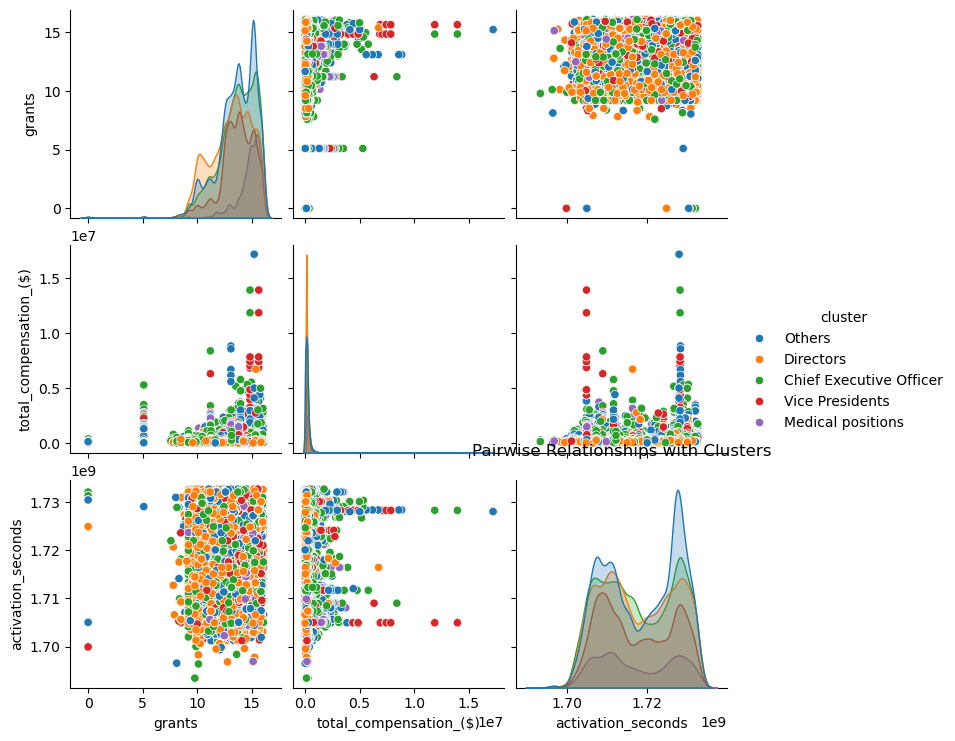

In [32]:
sns.pairplot(dataset, vars=["grants", "total_compensation_($)", "activation_seconds"], hue="cluster")
plt.title("Pairwise Relationships with Clusters")
plt.show()


### **Explanation of the Updated Pairwise Relationships Visualization**

#### **Description**
This pairwise relationships plot explores the interaction between numerical features (`grants`, `total_compensation_($)`, and `activation_seconds`) categorized by **job titles**, which are represented as **clusters** in the legend (e.g., "Directors," "Chief Executive Officer," etc.).

- **Diagonal Plots**: Display the distribution of each numerical variable (using Kernel Density Estimates, KDE) for different job title groups.
- **Off-Diagonal Scatterplots**: Show the pairwise relationships between numerical variables, color-coded by job titles.

---

#### **Key Observations**
1. **`grants` vs `total_compensation_($)`**:
   - A **positive relationship** exists between `grants` and `total_compensation_($)`—higher grant amounts are associated with higher executive compensation.
   - Specific groups dominate different regions:
     - **Chief Executive Officers** (green) and **Vice Presidents** (red) tend to have higher compensation and larger grants compared to other groups.
     - **Directors** (orange) and **Medical Positions** (purple) are more evenly distributed but concentrated at lower ranges of grants and compensation.

2. **Distributions of `grants`**:
   - The KDE plot shows distinct peaks for **Directors** and **Others**, indicating that these roles often work with grants concentrated around specific values.
   - **Chief Executive Officers** have a wider distribution, covering both smaller and larger grant amounts.

3. **`activation_seconds` vs Other Features**:
   - There is **no strong relationship** between `activation_seconds` and either `grants` or `total_compensation_($)`.
   - Most groups are concentrated in a narrow range of `activation_seconds`, with minimal differentiation.

4. **Cluster Dominance**:
   - **Chief Executive Officers** (green) and **Vice Presidents** (red) consistently appear at higher compensation levels, standing out from other groups like **Directors** and **Medical Positions**.

---

#### **Purpose of the Plot**
This visualization provides insights into:
- **Relationships** between numerical variables, such as how grants influence compensation.
- **Cluster-specific trends**, such as job titles influencing grant allocation and compensation.
- **Overlap and variability** between different job title groups.

---


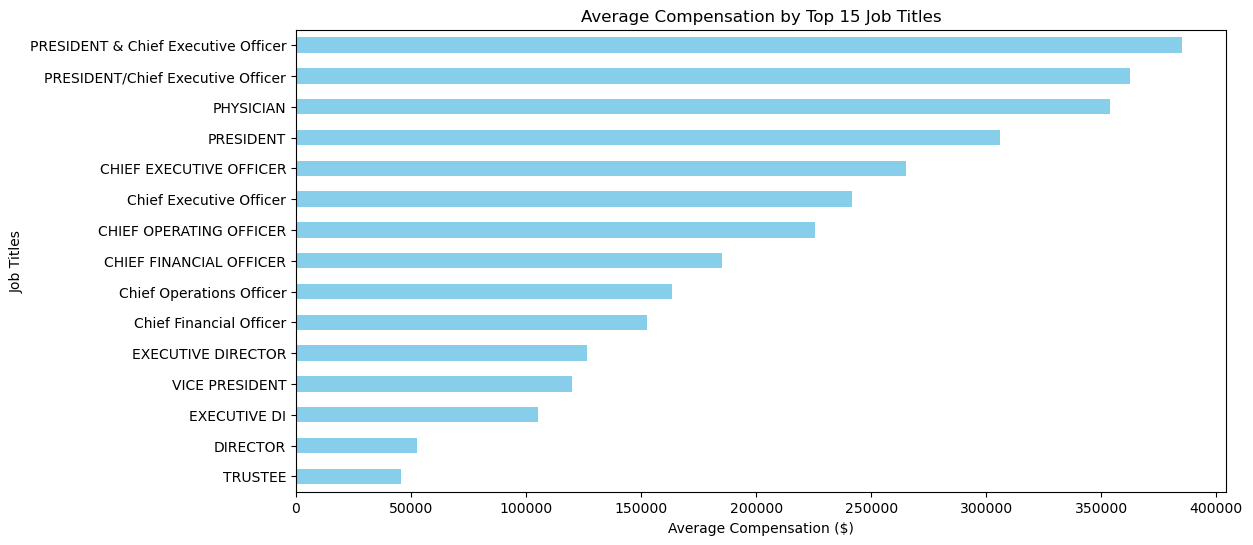

In [33]:
top_titles = dataset["expanded_job_titles"].value_counts().head(15).index
filtered_data = dataset[dataset["expanded_job_titles"].isin(top_titles)]

avg_compensation = filtered_data.groupby("expanded_job_titles")["total_compensation_($)"].mean().sort_values()

plt.figure(figsize=(12, 6))
avg_compensation.plot(kind="barh", color="skyblue")
plt.title("Average Compensation by Top 15 Job Titles")
plt.xlabel("Average Compensation ($)")
plt.ylabel("Job Titles")
plt.show()


### **Explanation of the Bar Plot: Average Compensation by Top 15 Job Titles**

#### **Description**
This horizontal bar plot displays the **average compensation** for the top 15 most prominent job titles based on their total compensation. The x-axis represents the **average compensation in dollars ($)**, while the y-axis lists the **job titles**.

---

#### **Key Observations**
1. **Top Earners**:
   - **`PRESIDENT & Chief Executive Officer`** and **`PRESIDENT/Chief Executive Officer`** are the top earners, with average compensation nearing **$400,000**.
   - These roles represent the highest-ranking executives with significant responsibilities in organizational strategy and decision-making.

2. **Specialized Roles**:
   - **`PHYSICIAN`** is among the highest earners, reflecting specialized medical roles that demand expertise and carry high compensation.

3. **Executive Roles**:
   - Roles such as **`Chief Executive Officer`**, **`Chief Operating Officer`**, and **`Chief Financial Officer`** consistently appear with high average compensation, highlighting the importance of C-level executives.

4. **Lower Compensation for Trustees and Directors**:
   - **`TRUSTEE`** and **`DIRECTOR`** have the lowest average compensation among the top 15 job titles, likely due to these roles being more focused on oversight or smaller-scale responsibilities compared to executive positions.

5. **Narrow Variability in Executive Titles**:
   - Variations between titles like **`President`**, **`Chief Executive Officer`**, and **`Chief Operating Officer`** are relatively small, indicating competitive pay structures for leadership roles.

---

#### **Purpose of the Plot**
This plot is valuable for:
- Identifying roles with the **highest financial impact**.
- Comparing the **compensation hierarchy** across different job titles.
- Highlighting **specialized roles** (e.g., Physicians) that command competitive pay.

---


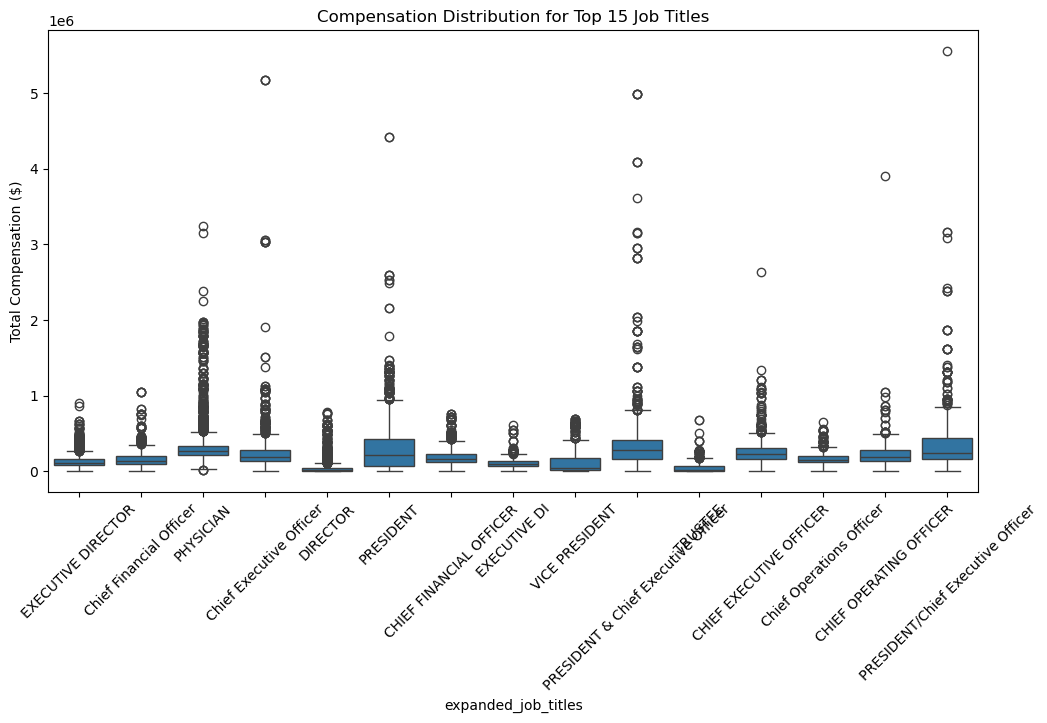

In [34]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="expanded_job_titles", y="total_compensation_($)", 
            data=filtered_data, order=filtered_data["expanded_job_titles"].value_counts().index)
plt.title("Compensation Distribution for Top 15 Job Titles")
plt.xticks(rotation=45)
plt.ylabel("Total Compensation ($)")
plt.show()


### **Explanation of the Boxplot: Compensation Distribution for Top 15 Job Titles**

#### **Description**
This boxplot visualizes the **distribution of total compensation (`total_compensation_($)`)** for the **top 15 job titles**. Each box represents the interquartile range (IQR) of compensation for a specific job title, while the individual points above or below the whiskers indicate **outliers** (extremely high or low values).

---

#### **Key Components**
1. **Box (IQR)**:
   - The central box represents the middle 50% of compensation values (from the 25th percentile to the 75th percentile).
   - The line within the box is the **median compensation** for that job title.

2. **Whiskers**:
   - The whiskers extend to the lowest and highest values within 1.5 times the IQR.
   - Points outside the whiskers are considered **outliers**.

3. **Outliers**:
   - Individual circles represent compensation values that fall outside the typical range for each job title.
   - These are often **exceptional salaries** for highly specialized or senior positions.

---

#### **Key Observations**
1. **Wide Variability in Compensation**:
   - High-ranking roles like **`President`**, **`Chief Executive Officer`**, and **`Vice President`** exhibit significant variability, as indicated by large IQRs and many outliers.
   - For example, the **`PRESIDENT & Chief Executive Officer`** role shows outliers earning over $5M.

2. **Concentration Around Median Values**:
   - Roles like **`Executive Director`** and **`Director`** have narrower IQRs, indicating more consistent compensation levels for these positions.

3. **Outliers Reflect Senior or Specialized Roles**:
   - High outliers are common for roles such as **`PHYSICIAN`**, **`Chief Executive Officer`**, and **`Chief Financial Officer`**, likely representing highly skilled or senior individuals with significant responsibilities.

4. **Median Differences Across Titles**:
   - While **`President`** and **`Chief Executive Officer`** roles dominate in compensation, titles like **`Director`** and **`Trustee`** have lower medians, reflecting their typically smaller scale of responsibilities.

---

#### **Purpose of the Plot**
This visualization is useful for:
- Highlighting **variability in pay structures** across job titles.
- Identifying **outliers** that may require further investigation.
- Comparing **compensation consistency** within roles.

---



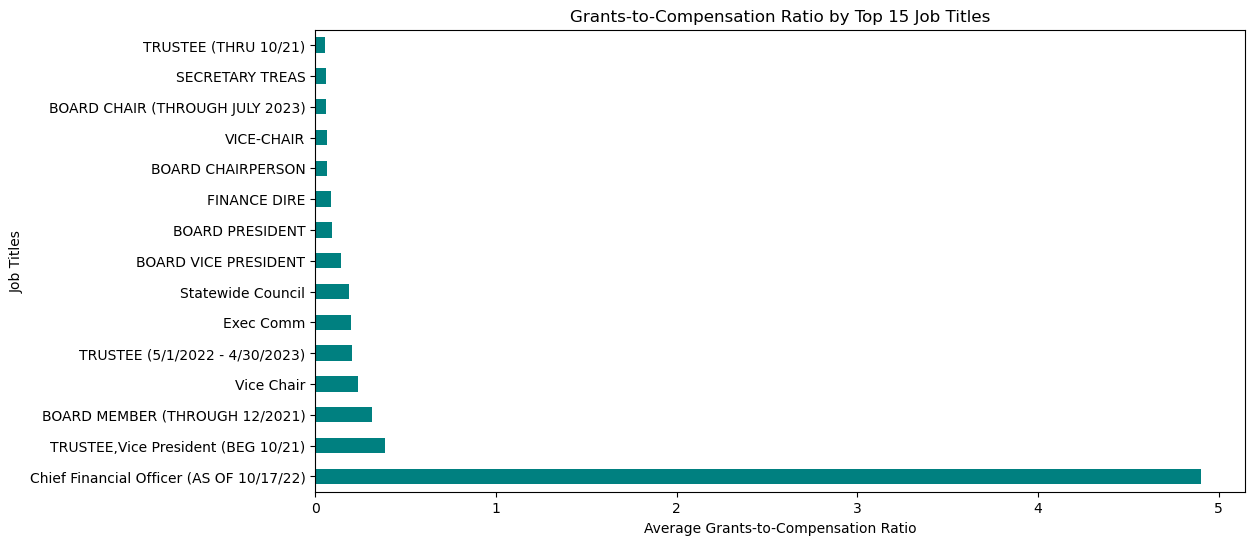

In [36]:
# Create a grants-to-compensation ratio column
dataset["grants_to_comp_ratio"] = dataset["grants"] / dataset["total_compensation_($)"]

# Calculate the mean ratio by job title
ratio_by_title = dataset.groupby("expanded_job_titles")["grants_to_comp_ratio"].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
ratio_by_title.head(15).plot(kind="barh", color="teal")
plt.title("Grants-to-Compensation Ratio by Top 15 Job Titles")
plt.xlabel("Average Grants-to-Compensation Ratio")
plt.ylabel("Job Titles")
plt.show()


### **Insights from the Grants-to-Compensation Ratio by Top 15 Job Titles**

#### **Description**
This bar chart shows the **average grants-to-compensation ratio** for the top 15 job titles. The ratio is calculated as the total grants divided by total compensation. Higher values indicate that more grants are allocated relative to the executive's compensation, suggesting efficient use of grants.

---

#### **Key Observations**
1. **Significantly High Ratio for Chief Financial Officer (CFO)**:
   - **`Chief Financial Officer (AS OF 10/17/22)`** has a remarkably higher grants-to-compensation ratio (above 4.5) compared to other roles. 
   - This indicates that CFOs in this category are responsible for managing substantial grants relative to their personal compensation, suggesting efficient financial management.

2. **Low Ratios Across Other Roles**:
   - Roles like **`TRUSTEE (THRU 10/21)`**, **`SECRETARY TREAS`**, and **`BOARD CHAIR`** have very low grants-to-compensation ratios, indicating either:
     - Higher compensation relative to the grants they manage.
     - Limited grant management responsibilities tied to these roles.

3. **Moderately Efficient Roles**:
   - Positions like **`Vice Chair`**, **`TRUSTEE, Vice President`**, and **`BOARD MEMBER`** have slightly higher ratios but remain below 1.0, reflecting moderate efficiency in managing grants compared to their compensation.

4. **Outlier Status of CFO**:
   - The **CFO role stands out as an outlier**, suggesting that financial executives often handle significant amounts of grants compared to their compensation. This may reflect the role's responsibility for overseeing financial strategies and grant distribution.

---

#### **Insights**
- **CFO Efficiency**:
  - The CFO's high grants-to-compensation ratio likely reflects their role's accountability for managing organizational finances and overseeing grant distribution effectively.
  
- **Non-Financial Roles**:
  - Roles like trustees and board chairs may have less direct involvement in grant management, explaining their lower ratios.
  
- **Role Prioritization**:
  - Organizations might evaluate whether compensation levels align with the scale of grant responsibilities, especially for roles with low ratios.

---


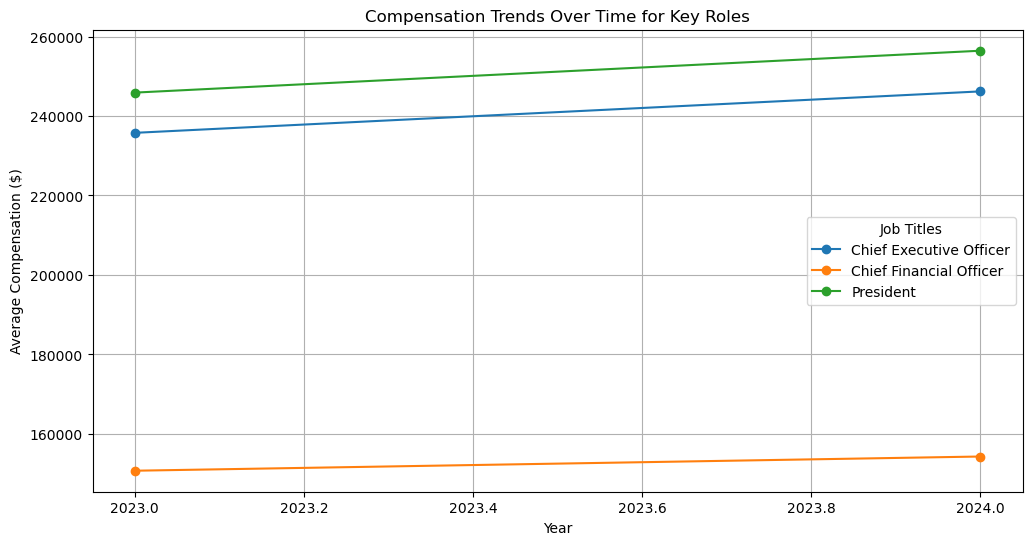

In [59]:
# Filter data for key job titles
key_roles = ["Chief Executive Officer", "President", "Chief Financial Officer"]
filtered_data = dataset[dataset["expanded_job_titles"].isin(key_roles)]

# Group by year and job title
comp_trends = filtered_data.groupby(["year", "expanded_job_titles"])["total_compensation_($)"].mean().unstack()

# Plot
comp_trends.plot(kind="line", figsize=(12, 6), marker="o")
plt.title("Compensation Trends Over Time for Key Roles")
plt.xlabel("Year")
plt.ylabel("Average Compensation ($)")
plt.legend(title="Job Titles")
plt.grid()
plt.show()


### **Insights from Compensation Trends Over Time for Key Roles**

#### **Description**
This line plot visualizes the **average compensation trends** over time (from 2023 to 2024) for three key executive roles:
- **Chief Executive Officer (CEO)**
- **Chief Financial Officer (CFO)**
- **President**

The x-axis represents the **time (in years)**, while the y-axis shows the **average compensation in dollars ($)** for each role.

---

#### **Key Observations**
1. **Consistent Increase in Compensation**:
   - All three roles show a **steady upward trend** in compensation over the year.
   - This reflects a consistent rise in executive compensation, possibly due to inflation, increased responsibilities, or organizational growth.

2. **Compensation Rankings**:
   - **`President`** consistently earns the **highest average compensation** among the three roles, starting at around $250,000 in 2023 and reaching approximately $260,000 by 2024.
   - **`Chief Executive Officer (CEO)`** follows closely, with compensation increasing from around $240,000 to $250,000 over the same period.
   - **`Chief Financial Officer (CFO)`** earns the lowest among the three, with compensation increasing marginally from about $160,000 to just under $170,000.

3. **Rate of Increase**:
   - The **President's compensation** has the steepest slope, indicating a faster rate of increase compared to the CEO and CFO roles.
   - The **CFO’s compensation growth** is relatively slower, highlighting a smaller percentage increase over the year.

---

#### **Insights**
1. **Executive Role Dynamics**:
   - The higher compensation for **Presidents** suggests their central role in organizational leadership and decision-making, which commands a premium salary.
   - The relatively lower compensation for **CFOs** reflects the financial nature of their responsibilities, which may not demand as high compensation as broader strategic roles.

2. **Industry Trends**:
   - The uniform upward trend suggests that compensation for high-level executives is increasing across the board, possibly driven by competitive pressures or economic factors.

---


/var/folders/kb/y1bgwmjn4070gtks6786jdy40000gn/T/ipykernel_44160/403423851.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




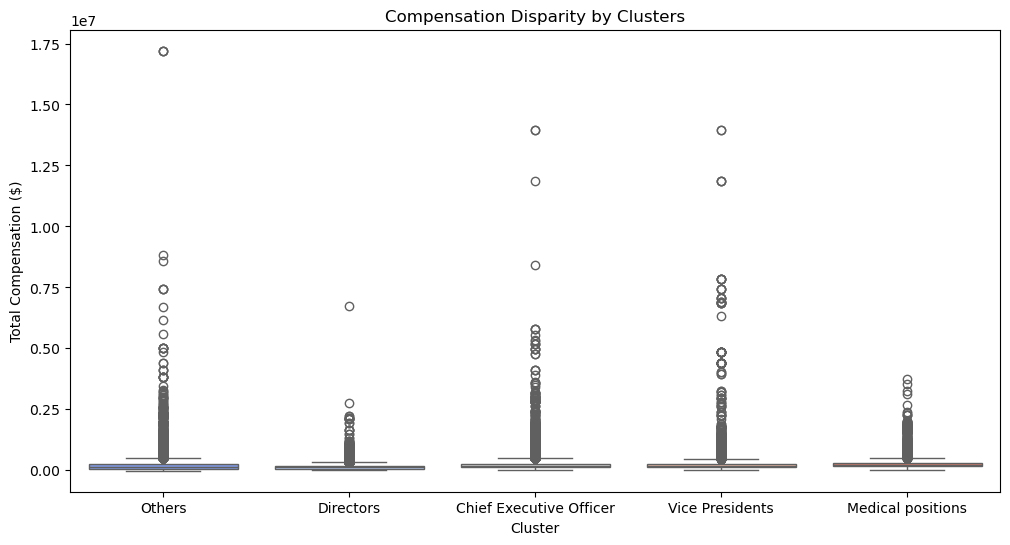

In [60]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="cluster", y="total_compensation_($)", data=dataset, palette="coolwarm")
plt.title("Compensation Disparity by Clusters")
plt.xlabel("Cluster")
plt.ylabel("Total Compensation ($)")
plt.show()


### **Insights from Compensation Disparity by Clusters**

#### **Description**
This boxplot visualizes the **distribution of total compensation (`total_compensation_($)`)** across five clusters:
- **Others**
- **Directors**
- **Chief Executive Officer**
- **Vice Presidents**
- **Medical Positions**

The x-axis represents the clusters, while the y-axis shows the compensation in dollars. Each box summarizes the compensation distribution within the cluster, with circles representing outliers.

---

#### **Key Observations**
1. **Wide Compensation Disparities**:
   - All clusters exhibit significant disparities in compensation, with numerous outliers earning much higher than the median compensation levels.

2. **Chief Executive Officer Cluster**:
   - The **CEO cluster** has some of the **highest outliers**, with compensation exceeding $1.5M.
   - This highlights the premium compensation for top executives, likely reflecting their critical organizational responsibilities.

3. **Vice Presidents and Medical Positions**:
   - Both clusters show high variability, with outliers above $1M. However, their medians are closer to other clusters, suggesting only a subset of these roles command extremely high pay.

4. **Directors and Others**:
   - These clusters exhibit lower median compensation and smaller IQRs (interquartile ranges), indicating more consistent and modest compensation compared to CEOs and Vice Presidents.

5. **Outliers Across Clusters**:
   - Each cluster contains a few extreme outliers, suggesting some roles receive exceptional compensation, likely due to specialized skills, seniority, or unique responsibilities.

---

#### **Insights**
1. **Executive Compensation**:
   - The **CEO and Vice Presidents clusters** dominate in terms of both median and high-end compensation, reflecting their pivotal roles in decision-making and strategy.

2. **Consistency in Pay**:
   - Clusters like **Directors** and **Others** show narrower ranges and fewer extreme outliers, indicating more uniform pay scales for these positions.

3. **Role of Medical Positions**:
   - While **Medical Positions** have fewer outliers compared to CEOs, the presence of high earners indicates specialized medical professionals commanding competitive salaries.

---


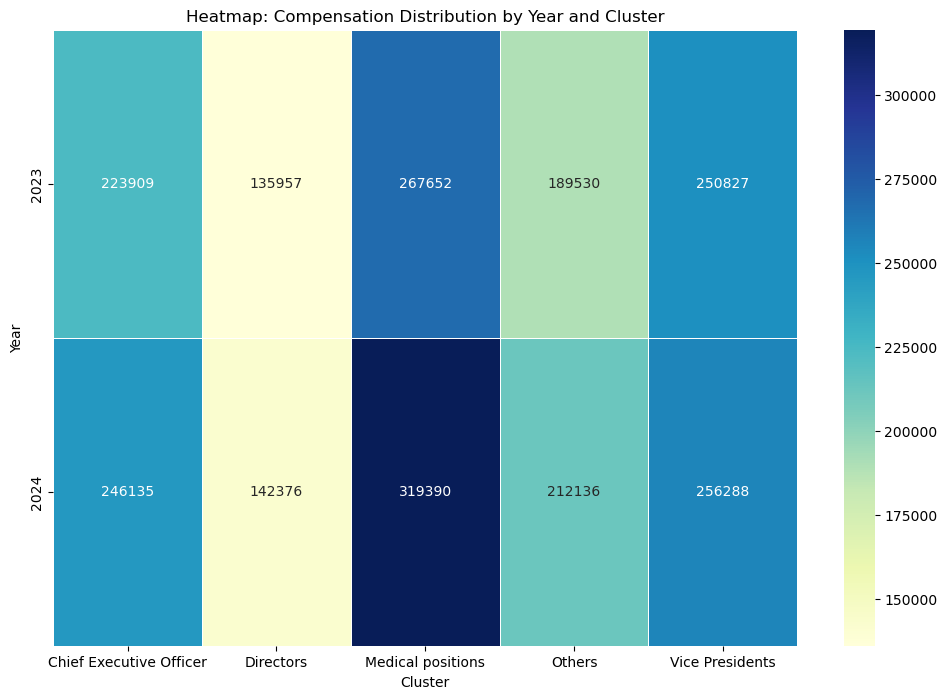

In [61]:
# Create a pivot table
heatmap_data = dataset.pivot_table(values="total_compensation_($)", index="year", columns="cluster", aggfunc="mean")

# Plot
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=0.5)
plt.title("Heatmap: Compensation Distribution by Year and Cluster")
plt.xlabel("Cluster")
plt.ylabel("Year")
plt.show()


### **Insights from the Heatmap: Compensation Distribution by Year and Cluster**  

#### **Description**  
This heatmap visualizes the **compensation distribution across different job clusters (roles) for 2023 and 2024**. The color gradient represents the variation in compensation levels, with darker shades indicating higher compensation.  

---

### **Key Observations**  

#### **Overall Compensation Growth:**  
- Compensation **increased across all clusters** from 2023 to 2024, suggesting a general upward trend in salaries.  
- The most significant increase is in **Medical Positions**, rising from **~$267K in 2023 to ~$319K in 2024**.  

#### **Medical Positions Lead in Compensation:**  
- **Medical Positions consistently have the highest compensation**, surpassing other clusters in both years.  
- The **gap widened in 2024**, indicating a greater focus on healthcare-related roles.  

#### **CEO & VP Salaries Also Grew:**  
- **Chief Executive Officers (CEOs)** saw an increase from **$223K to $246K**.  
- **Vice Presidents (VPs)** also experienced steady growth from **$250K to $256K**.  

#### **Moderate Growth in Directors & Other Roles:**  
- **Directors saw only a slight increase**, from **$135K to $142K**, maintaining the lowest compensation among all clusters.  
- **The "Others" category rose from $189K to $212K**, showing moderate salary adjustments.  


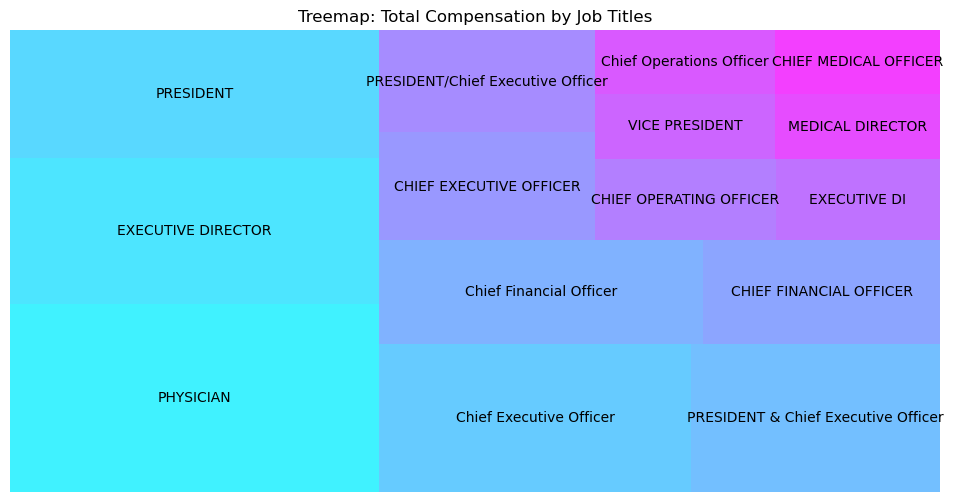

In [62]:
import squarify

# Aggregate total compensation by job titles
comp_by_title = dataset.groupby("expanded_job_titles")["total_compensation_($)"].sum().sort_values(ascending=False).head(15)

# Plot
plt.figure(figsize=(12, 6))
squarify.plot(sizes=comp_by_title.values, label=comp_by_title.index, alpha=0.8, color=sns.color_palette("cool", len(comp_by_title)))
plt.title("Treemap: Total Compensation by Job Titles")
plt.axis("off")
plt.show()


### **Insights from the Heatmap: Compensation Distribution by Year and Cluster**

#### **Description**
This heatmap visualizes the **average compensation (`total_compensation_($)`)** for various clusters across two years, 2023 and 2024. Each cell represents the average compensation for a specific cluster in a particular year, with color intensity corresponding to the magnitude of compensation. Darker colors indicate higher compensation levels.

---

#### **Key Observations**
1. **Highest Compensation Cluster**:
   - **Medical Positions** consistently earn the highest average compensation across both years:
     - **2023**: $267,652
     - **2024**: $319,390
   - The significant increase from 2023 to 2024 highlights the growing demand or recognition for medical professionals.

2. **Chief Executive Officer (CEO)**:
   - CEOs have the second-highest average compensation, with steady growth:
     - **2023**: $223,909
     - **2024**: $246,135
   - This reflects the importance of leadership roles in driving organizational strategy.

3. **Vice Presidents**:
   - Vice Presidents also maintain a high average compensation:
     - **2023**: $250,827
     - **2024**: $256,288
   - The slight increase suggests stable compensation practices for this cluster.

4. **Directors and Others**:
   - **Directors** and **Others** exhibit the lowest compensation:
     - Directors:
       - **2023**: $135,957
       - **2024**: $142,376
     - Others:
       - **2023**: $189,530
       - **2024**: $212,136
   - Both clusters show gradual increases, but their compensation remains significantly below the top clusters.

5. **Yearly Trends**:
   - Across all clusters, compensation increases from 2023 to 2024.
   - The most notable increase is for **Medical Positions**, with a rise of $51,738.

---

#### **Insights**
1. **Role-Specific Trends**:
   - Medical Positions and CEOs consistently command the highest compensation, emphasizing their critical contributions to organizational success.
   - Directors and Others reflect lower levels of responsibility or specialization.

2. **Compensation Growth**:
   - The steady rise in compensation across all clusters highlights industry trends, such as inflation or increasing competition for top talent.

3. **Cluster-Specific Insights**:
   - The relatively high and stable compensation for Vice Presidents indicates their strategic importance across years.

---

In [63]:


# Ensure dataset has a `state` or `region` column with valid state abbreviations
# Aggregate total compensation by state
state_compensation = dataset.groupby("state")["total_compensation_($)"].sum().reset_index()

# Create a USA map heatmap
fig = px.choropleth(
    state_compensation, 
    locations="state", 
    locationmode="USA-states", 
    color="total_compensation_($)", 
    color_continuous_scale="Blues",
    scope="usa",
    title="Total Compensation by State"
)
fig.update_layout(geo=dict(lakecolor="rgb(255, 255, 255)"))
fig.show()


### **Insights from the Map: Total Compensation by State**

#### **Description**
This choropleth map visualizes the **total compensation (`total_compensation_($)`)** distributed across various states in the USA. The color intensity corresponds to the magnitude of total compensation, with darker shades representing higher compensation totals.

---

#### **Key Observations**
1. **High-Compensation States**:
   - **California (CA)** has the highest total compensation, indicated by the darkest shade on the map. This reflects the presence of large organizations or high numbers of executives in this state.
   - **New York (NY)** and a few other northeastern states also exhibit high compensation totals, likely driven by financial hubs and corporate headquarters.

2. **Moderate-Compensation States**:
   - States such as **Texas (TX)** and **Illinois (IL)** have moderate compensation totals. These states may have a mix of large companies and regional offices contributing to their compensation levels.

3. **Low-Compensation States**:
   - Many midwestern and southern states show lighter shades, indicating lower total compensation. This could be due to fewer high-paying organizations or smaller-scale businesses in these regions.

4. **Regional Trends**:
   - Compensation is concentrated along the **West Coast (California)**, the **Northeast (New York)**, and parts of the **Midwest (Illinois)**, which are known hubs for industry and commerce.
   - **Sparse compensation levels** in rural states such as those in the Great Plains suggest less corporate density.

---

#### **Insights**
1. **Industry Hubs**:
   - States like California and New York dominate due to their high density of industries such as technology, finance, and entertainment.

2. **Regional Disparities**:
   - The map highlights clear regional disparities, with compensation concentrated in urbanized and economically developed states.

3. **Potential for Growth**:
   - States with lighter shades represent opportunities for businesses to expand or invest, particularly if they want to diversify operations into less competitive regions.

---



In [64]:
# Aggregate total grants by state
state_grants = dataset.groupby("state")["grants"].sum().reset_index()

# Create a USA map heatmap
fig = px.choropleth(
    state_grants, 
    locations="state", 
    locationmode="USA-states", 
    color="grants", 
    color_continuous_scale="Greens",
    scope="usa",
    title="Grants Distribution by State"
)
fig.update_layout(geo=dict(lakecolor="rgb(255, 255, 255)"))
fig.show()


### **Insights from the Map: Grants Distribution by State**

#### **Description**
This choropleth map visualizes the **total grants (`grants`)** distributed across various states in the USA. The intensity of the green color indicates the amount of grants, with darker shades representing higher totals.

---

#### **Key Observations**
1. **Highest Grant Distribution**:
   - **California (CA)** leads in total grant distribution, indicated by the darkest shade. This is likely due to the presence of large institutions and organizations that secure substantial grant funding.
   - **New York (NY)** and other northeastern states also receive high amounts of grants, reflecting their economic and industrial significance.

2. **Moderate Grant Distribution**:
   - States such as **Texas (TX)** and **Illinois (IL)** have moderate grant totals. These states are economic hubs but may not have the same density of grant-receiving organizations as California or New York.

3. **Low Grant Distribution**:
   - States in the central and southern regions, such as those in the Great Plains, show lighter shades, indicating lower levels of grant funding. This could be attributed to fewer research institutions or smaller-scale industries.

4. **Regional Trends**:
   - The **West Coast (California)** and the **Northeast (New York, Pennsylvania)** dominate in grant funding.
   - **Sparse grant distribution** is observed in rural states, highlighting disparities in access to funding.

---

#### **Insights**
1. **Economic and Institutional Impact**:
   - States with larger urban centers and research institutions (e.g., California, New York) secure higher grant funding, showcasing the influence of infrastructure and resources on funding allocation.

2. **Opportunities for Growth**:
   - States with lighter shades represent potential opportunities to attract more grant funding by encouraging research initiatives or industrial investments.

3. **Geographic Disparities**:
   - The map highlights disparities in grant distribution, emphasizing the need for policies that promote equitable access to funding in less industrialized states.

---



In [65]:
# Aggregate data by state
state_data = dataset.groupby("state").agg({
    "total_compensation_($)": "mean",
    "grants": "sum"
}).reset_index()

# Create a bubble map
fig = px.scatter_geo(
    state_data,
    locations="state",
    locationmode="USA-states",
    size="grants",
    color="total_compensation_($)",
    color_continuous_scale="Viridis",
    scope="usa",
    title="Average Compensation and Total Grants by State",
    size_max=50
)
fig.update_layout(geo=dict(lakecolor="rgb(255, 255, 255)"))
fig.show()


### **Insights from the Bubble Map: Average Compensation and Total Grants by State**

#### **Description**
This bubble map combines two dimensions:
1. **Average Compensation (`total_compensation_($)`)**: Represented by the color gradient, where yellow indicates higher average compensation and purple indicates lower average compensation.
2. **Total Grants**: Represented by the size of the bubble, where larger bubbles indicate higher total grants allocated to the state.

---

#### **Key Observations**
1. **California (CA)**:
   - The largest bubble, indicating the **highest total grants** among all states.
   - Average compensation levels are also relatively high, reflecting the economic significance of California as a hub for organizations securing substantial grants.

2. **Northeast States (e.g., New York, Massachusetts)**:
   - States like **New York (NY)** and **Massachusetts** have large bubbles, indicating significant total grants.
   - New York stands out with **high average compensation**, as indicated by the yellow color.

3. **Texas (TX)**:
   - Texas features a large bubble with moderate compensation levels, highlighting its position as a key player in grant allocation.

4. **Smaller States**:
   - States with smaller bubbles (e.g., those in the Midwest) receive fewer total grants, and many have lower average compensation levels, as indicated by the purple colors.

5. **Disparities Across the USA**:
   - The West Coast (California) and Northeast dominate in terms of both total grants and average compensation.
   - Central and southern states exhibit smaller bubbles and darker color gradients, indicating lower total grants and compensation levels.

---

#### **Insights**
1. **High-Impact States**:
   - States like California and New York receive substantial grant funding and maintain high compensation averages, reinforcing their status as economic and organizational hubs.

2. **Regional Disparities**:
   - There is a clear disparity between states in terms of grant allocation and compensation, with states in the central regions receiving significantly less.

3. **Alignment Between Grants and Compensation**:
   - States with larger grant totals often exhibit higher compensation averages, suggesting a correlation between organizational scale and executive pay.

---


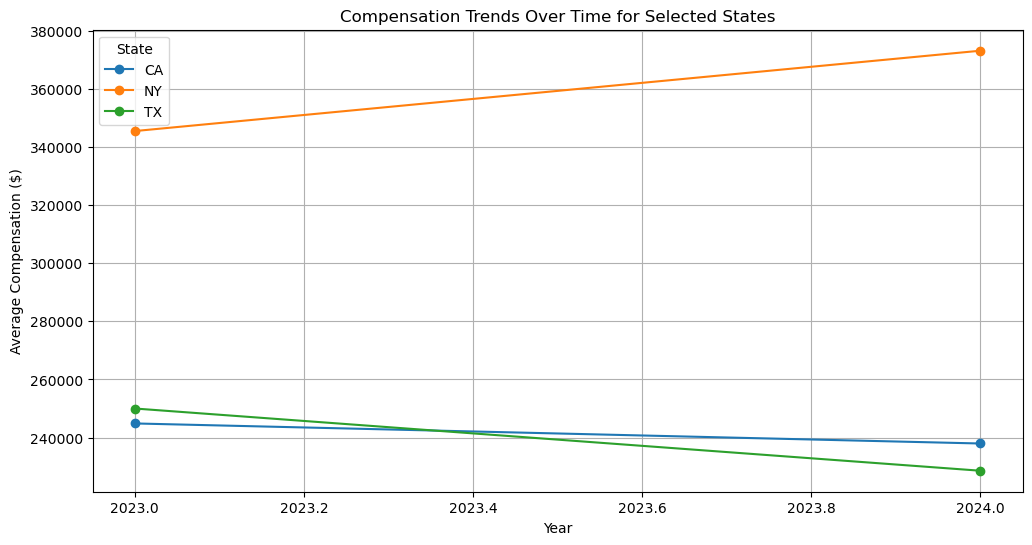

In [66]:
# Filter data for selected states
selected_states = ["CA", "NY", "TX"]  # Adjust state abbreviations
filtered_data = dataset[dataset["state"].isin(selected_states)]

# Group by year and state
state_trends = filtered_data.groupby(["year", "state"])["total_compensation_($)"].mean().unstack()

# Plot
state_trends.plot(kind="line", figsize=(12, 6), marker="o")
plt.title("Compensation Trends Over Time for Selected States")
plt.xlabel("Year")
plt.ylabel("Average Compensation ($)")
plt.legend(title="State")
plt.grid()
plt.show()


### **Insights from the Line Chart: Compensation Trends Over Time for Selected States**

#### **Description**
This line chart visualizes the **average compensation trends** over time (2023–2024) for executives in three key states:
- **California (CA)**
- **New York (NY)**
- **Texas (TX)**

The x-axis represents the year, and the y-axis represents the average compensation in dollars ($). Each line corresponds to a state, showing how compensation levels change over time.

---

#### **Key Observations**
1. **New York (NY)**:
   - **Steady Increase**: New York shows a consistent upward trend in average compensation, rising from approximately **$340,000 in 2023** to over **$370,000 in 2024**.
   - This indicates strong growth in compensation, possibly due to the state’s high concentration of financial and corporate institutions.

2. **California (CA)**:
   - **Slight Decline**: Compensation in California decreases slightly from **$260,000 in 2023** to just below **$250,000 in 2024**.
   - This could reflect changes in organizational priorities, cost management, or industry shifts within the state.

3. **Texas (TX)**:
   - **Gradual Decline**: Texas also shows a downward trend in compensation, falling from **$250,000 in 2023** to approximately **$240,000 in 2024**.
   - The decline may indicate reduced economic activity or fewer high-paying roles in certain sectors within Texas.

---

#### **Insights**
1. **State-by-State Comparison**:
   - New York consistently leads in average compensation, maintaining a significant margin above California and Texas.
   - This reflects New York’s dominance as a hub for high-paying industries such as finance, law, and corporate management.

2. **Diverging Trends**:
   - While New York experiences a sharp increase in average compensation, both California and Texas show slight declines, indicating regional disparities in executive pay growth.

3. **Economic Indicators**:
   - The increase in New York may signal economic expansion or competitive pressures driving up salaries.
   - Conversely, the declines in California and Texas may reflect cost-cutting measures or shifting industry dynamics.

---

